In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# set defaults
plt.style.use('seaborn-white')   # seaborn custom plot style
plt.rc('figure', dpi=100, figsize=(7, 5))   # set default size/resolution
plt.rc('font', size=12)   # font size

In [2]:
np.random.seed(42)

flips1 = pd.DataFrame(np.random.choice(['H', 'T'], p=[0.55, 0.45], size=(114,1)), columns=['result'])
flips2 = pd.DataFrame(np.random.choice(['H', 'T'], p=[0.50, 0.50], size=(87,1)), columns=['result'])
flips3 = pd.DataFrame(np.random.choice(['H', 'T'], p=[0.7, 0.3], size=(12,1)), columns=['result'])

# Lecture 4

### Testing Hypotheses

## Answering Question with Certainty

* Now that out data is cleaned, and
* We're confident its faithful to the data generating process (DGP)...
* How do we ask questions and draw conclusions about the DGP from the data?


## Is this coin fair?

* Given a dataset of coin flips; was the coin a fair coin?
* Do we 'trust' the dataset?
* What is fair? 
    - Ideally: 50H:50T? but does this ever happen?
    - What is a 'reasonable' deviation?

In [3]:
flips1.head()

,result
0,H
1,T
2,T
3,T
4,H


In [4]:
flips1['result'].value_counts().to_frame()

,result
H,68
T,46


### What is the reasonable deviation in observed data?

In [5]:
# normalize that to get the empirical distribution!
flips1['result'].value_counts(normalize=True).to_frame()

,result
H,0.596491
T,0.403509


## Hypothesis Testing
* Understand what 'reasonable' deviation is from 'expected.'
* Assess how much the *observed* data deviates from 'expected' -- is it reasonable?

These concepts need to be *quantified* with measurements!

## Measuring the fairness of a coin? Making it quantified

Suppose a coin is flipped $N$ times, $N_H$ of which were heads. For each measurement, what is the value you expect from $N$ flips of a fair coin?

* $N_H$, (number of heads)
* $\frac{N_H}{N}$, (proportion of heads)
* $N_H - \frac{N}{2}$, (difference from expected number of heads)
* $|N_H - \frac{N}{2}|$, (absolute difference from expected number of heads)

Each of these is a **test statistic**, which measures information that answers the questions we're trying to answer.

## Measuring the fairness of a coin? 114 flips fair vs observed

Suppose a coin is flipped $N$ times, $N_H$ of which were heads. For each measurement, what is the value you expect from $N$ flips of a fair coin?

* $N_H$, (number of heads): 57/68 (expected value)
* $\frac{N_H}{N}$, 0.5/0.59 (proportion of heads)
* $N_H - \frac{N}{2}$, 0/11 (difference from expected number of heads)
* $|N_H - \frac{N}{2}|$, 0/11 (absolute difference from expected number of heads)

Each of these is a **test statistic**, which measures information that answers the questions we're trying to answer.

## Is this coin fair?

1. Use the 'number of heads' as the test-statistic
2. Calculate the observed value for this statistic
3. Simulate this test-statistic using a 'fair coin'
4. Ask: was the observed value likely to come from a 'fair coin'?

In [6]:
# flipped a coin 114 times
flips1.shape

(114, 1)

In [7]:
# resulted in 68 heads, is this too high? or normal fluctuations?
obs = (flips1['result'] == 'H').sum()
obs

68

In [8]:
# number of simulations
N = 10000

# flip a coin 114 times; do this N  times.
results = []
for _ in range(N):
    simulation = np.random.choice(['H', 'T'], p = [0.5, 0.5], size = 114)
    sim_heads = (simulation == 'H').sum()  # test stastistic
    results.append(sim_heads)

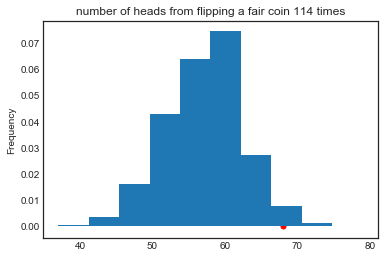

In [9]:
# sampling distribution 
pd.Series(results).plot(kind='hist', density=True, title='number of heads from flipping a fair coin 114 times');
plt.scatter([obs], [0], s=25, c='r');

*Do you think the coin was fair?*

In [10]:
# 2.5 / 100 times, you would draw the wrong conclusion!
(pd.Series(results) >= obs).mean()

0.0251

### Hypothesis Test: assessing the fairness of a coin

* Decide on a measurement to assess the question being asked of the data: number of heads.
    - This is called a **test statistic**
* Decide what 'expected' behavior is: 'a fair coin tossed 114 times results in ~57 Heads.'
    - This is called a **probability** model; 
    - Basis for understanding the (reasonable) deviation from expected 
    - It can be sampled.
* Simulate from the probability model and assess the likelihood the observed data is explained by it.
    - What is the likelihood you make a mistake asserting the observed data is *not explained* by it?
    - This is the **p-value**.

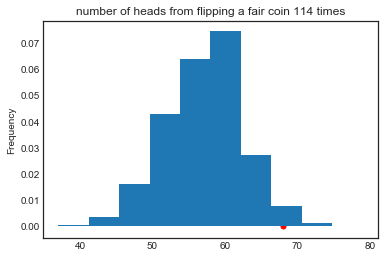

In [11]:
pd.Series(results).plot(kind='hist', density=True, title='number of heads from flipping a fair coin 114 times');
plt.scatter([obs], [0], s=25, c='r');

In [12]:
# 2.5 / 100 times, you would draw the wrong conclusion!
(pd.Series(results) >= obs).mean()

0.0251

### Aside: speeding up the simulation
* Instead of `H/T` use `1/0`
* Instead of a loop, use numpy (not always possible!)

In [13]:
flips1.head()

,result
0,H
1,T
2,T
3,T
4,H


In [14]:
flips1 = flips1.replace({'H': 1, 'T': 0})

In [15]:
flips1.head()

,result
0,1
1,0
2,0
3,0
4,1


In [16]:
# resulted in 68 heads, is this too high? or normal fluctuations?
obs = (flips1['result']).sum()
obs

68

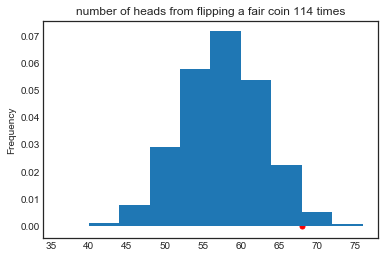

In [17]:
# number of simulations
N = 10000

# flip a coin 114 times; do this N  times.
simulations = pd.DataFrame(np.random.choice([1, 0], p=[0.5, 0.5], size=(N, 114)))
# apply test-statistic to the rows
test_stats = simulations.sum(axis=1)
# plot the sampling distribution
test_stats.plot(kind='hist', density=True, title='number of heads from flipping a fair coin 114 times');
plt.scatter([obs], [0], s=25, c='r');

## Hypothesis testing

Faced with a question about the data raised by an observation...
1. Carefully pose the question as a testable "yes or no" hypothesis.
2. Decide on a statistic that helps differentiate between instances that would affirm or reject the hypothesis.
3. Create a probability model for the data generating process that reflects the "known behavior" of the process.
4. Simulate the data generating process using this probability model (the 'Null Hypothesis').
5. Assess if the observation is consistent with the simulations.

### Jury Selection in Alameda County

<img src="imgs/image_0.png" width="75%">

See example from [DSC 10](https://www.inferentialthinking.com/chapters/11/2/Multiple_Categories.html).

## Jury Panels

<img src="imgs/image_1.png">

Section 197 of California's Code of Civil Procedure says, 
> "All persons selected for jury service shall be selected at random, from a source or sources inclusive of a representative cross section of the population of the area served by the court."

### ACLU study:
* ACLU studied the ethnic compisition of jury panels in 11 felony trials in Alameda county between 2009 and 2010.
* Total number of people reporting for jury duty: 1453
* Compared to demographics of the county

In [18]:
jury = pd.DataFrame([
    ['Asian', 0.15, 0.26],
    ['Black', 0.18, 0.08],
    ['Latino', 0.12, 0.08],
    ['White', 0.54, 0.54],
    ['Other', 0.01, 0.04]
], columns='Ethnicity,Eligible,Panels'.split(',')).set_index('Ethnicity')

jury

,Eligible,Panels
Ethnicity,,
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


### Are the differences in representation meaningful?
* Model: The people on the jury panels were selected at random from the eligible population
    - Alternative viewpoint: no, they weren't.
* Observed: Empirical distribution of panels
* Statistic: similarity to the "distribution of eligible jurors"
    - Distance between distributions? TVD

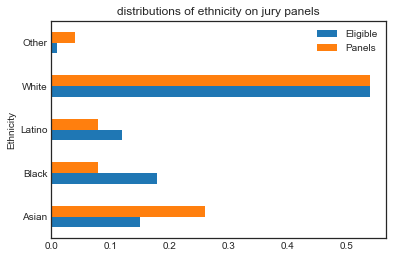

In [19]:
title='distributions of ethnicity on jury panels'
jury.plot(kind='barh', title=title);


In [20]:
def total_variation_distance(dist1, dist2):
    '''Given two empirical distributions, 
    both sorted with same categories, calculates the TVD'''
    return np.sum(np.abs(dist1 - dist2)) / 2

In [21]:
# Is this large? small? 
# sample from the model to understand the variation!
observed = total_variation_distance(jury['Eligible'], jury['Panels'])
observed

0.14

### Simulate drawing jury panels
* Model: Draw a random panel from "eligible" distribution
* Statistic: TVD between random panel and eligible
* Repeat and compare to observed statistic!

In [22]:
jury.index

Index(['Asian', 'Black', 'Latino', 'White', 'Other'], dtype='object', name='Ethnicity')

In [23]:
jury.Eligible

Ethnicity
Asian     0.15
Black     0.18
Latino    0.12
White     0.54
Other     0.01
Name: Eligible, dtype: float64

In [24]:
# sample 1453 jurors from eligible: sample a jury pool

draw = np.random.choice(jury.index, p=jury['Eligible'], size=1453)
rand_panel_props = pd.Series(draw).value_counts(normalize=True).rename('random panel')
rand_panel_props.to_frame()

,random panel
White,0.540950
Black,0.177564
Asian,0.148658
Latino,0.123193
Other,0.009635


In [25]:
with_samp = jury.assign(random_panel=rand_panel_props)
with_samp

,Eligible,Panels,random_panel
Ethnicity,,,
Asian,0.15,0.26,0.148658
Black,0.18,0.08,0.177564
Latino,0.12,0.08,0.123193
White,0.54,0.54,0.540950
Other,0.01,0.04,0.009635


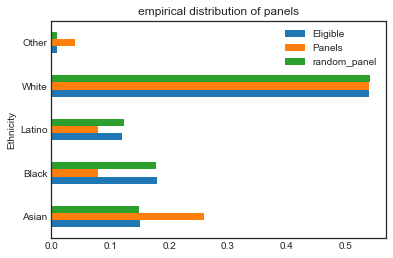

In [26]:
with_samp.plot(kind='barh', title='empirical distribution of panels');

In [27]:
total_variation_distance(with_samp['random_panel'], with_samp['Eligible'])

0.004143152099105262

### Put together the simulation

In [28]:
tvds = []

for i in np.arange(1000):
    draw = np.random.choice(jury.index, p=jury['Eligible'], size=1453)
    rand_panel_props = pd.Series(draw).value_counts(normalize=True).rename('random_panel')
    new_tvd = total_variation_distance(rand_panel_props, jury['Eligible'])
    tvds.append(new_tvd)

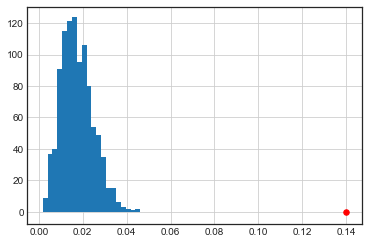

In [29]:
observed_tvd = total_variation_distance(jury['Panels'], jury['Eligible'])

pd.Series(tvds).hist(bins = 20)
plt.scatter(observed_tvd, 0, color='red', s=30);

### How to speed up the simulation?

* Get rid of the loop!
* Use `np.random.multinomial`

In [30]:
rndm = np.random.multinomial(1453, jury['Eligible'], size=10000)
rndm = rndm / 1453 # normalize the counts
rndm

array([[0.16173434, 0.16724019, 0.12319339, 0.53819683, 0.00963524],
       [0.14246387, 0.19064006, 0.11631108, 0.54026153, 0.01032347],
       [0.13695802, 0.17549897, 0.11975224, 0.55746731, 0.01032347],
       ...,
       [0.15209911, 0.18375774, 0.11837577, 0.53200275, 0.01376462],
       [0.15485203, 0.17136958, 0.13351686, 0.5285616 , 0.01169993],
       [0.14590502, 0.19545767, 0.12319339, 0.52718513, 0.00825877]])

In [31]:
# need to vectorizize the TVD to apply it row-wise 
tvds = np.sum(np.abs(rndm - jury['Eligible'].values), axis=1) / 2  

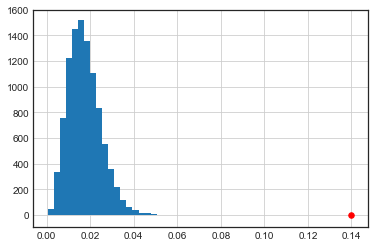

In [32]:
observed_tvd = total_variation_distance(jury['Panels'], jury['Eligible'])

pd.Series(tvds).hist(bins = 20)
plt.scatter(observed_tvd, 0, color='red', s=30);

### Are the jury panels representative?
* Likely not! The random samples are not like the observed panels.
* This doesn't say *why* the distributions are different!
    - Juries drawn from voter rolls and DMV.
    - The county rarely follows up on failures to report.
    - [Building the jury table is complicated](https://www.inferentialthinking.com/chapters/11/2/Multiple_Categories.html)!

### Summary of the method

To assess whether an "observed sample" was drawn randomly from a known categorical distribution:
* Use TVD as the statistic because it measures the distance between categorical distributions
* Sample at random from the population and compute the TVD of the random sample and known distribution to get an idea for what reasonable deviation from eligible pool would look like; repeat numerous times
* Compare:
    - Empirical distribution of simulated TVDs
    - Actual TVD from the sample in the study


# Decisions and Uncertainty

## Incomplete Information

<div class="image-txt-container">
    
* Want to Choose between two views of the world, based on data in a sample.
* It's not always clear whether the data are consistent with one view or the other.
* Random samples can turn out quite extreme. It is unlikely, but possible.
* *"Is this jury panel representative of the county?"*

<img src="imgs/jury_diversity.jpg" width="50%"/>

</div>

## Testing Hypotheses

<div class="image-txt-container">

* A test chooses between two views of how data were generated
* The views are called **hypotheses**
* The test picks the hypothesis that is better supported by the observed data
* *"the juries panels are / are not representative of the county."*

<img src="imgs/jury_diversity.jpg" width="50%"/>

</div>

## Null and Alternative

<div class="image-txt-container">

* The method only works if we can simulate data under one of the hypotheses.
* **Null hypothesis**
    - A well defined probability model about how the data were generated
    - We can simulate data under the assumptions of this model – “under the null hypothesis”
* **Alternative hypothesis**
    - A different view about the origin of the data

<img src="imgs/image_2.png" width="50%"/>

</div>

## Test Statistic

<div class="image-txt-container">
    
* The statistic that we choose to simulate, to decide between the two hypotheses
* What values of the statistic will make us lean towards the null hypothesis?
* What values will make us lean towards the alternative?

<img src="imgs/jury_tvd.png" width="100%">

</div>


## Prediction Under the Null Hypothesis

<div class="image-txt-container">

* Simulate the test statistic under the null hypothesis; draw the histogram of the simulated values
* This displays the **empirical distribution of the statistic under the null hypothesis**
* It shows all the likely values of the statistic
* The probabilities are approximate, because we can't generate all the possible random samples.


<img src="imgs/null_distribution.png" width="75%">

</div>


## Conclusion of the Test

<div class="image-txt-container">

* Resolving the choice between null and alternative hypotheses
* Compare the **observed test statistic** and the empirical distribution under the null hypothesis.
* If the observed value is **not consistent** with the distribution, then the test favors the alternative – “rejects the null hypothesis”

<img src="imgs/conclusion.png" width="100%">

</div>


## Examples of Null hypothesis

Often (but not always) the null hypothesis states there is no association or difference between variables or subpopulations. Like so, some typical null hypotheses are:

* The average income for men is similar to that for women 
* Nationality is (perfectly) unrelated to music preference
* The average population income was equal over 2012 through 2016


## Example of Alternative hypothesis

Hypothesis that sample observations are influenced by some non-random cause (unlike Null Hypothesis).


About 10% of the human population is left-handed. Suppose Aaron speculates that students in his class are more likely to be left-handed than people found in the general population.  


**Null Hypothesis:** Students in Aaron's class are no more likely to be left-handed than people in the general population.

**Alternative Hypothesis:** Students in Aaron's class are more likely to be left-handed than people in the general population.


## Performing a Hypothesis Test

### The Problem

* Large Statistics class divided into 12 discussion sections
* TAs lead the sections

* After the midterm, students in Section 3 notice that the average score in their section is lower than in others.




### The TA's Defense

TA’s position (Null Hypothesis):
* If we had picked my section at random from the whole class, we could observe an average score like this one.

Alternative:
* No, the average score is too low. Randomness is not the only reason for the low scores.


In [33]:
scores = pd.read_csv('data/scores_by_section.csv')
scores

,Section,Midterm
0,1,22
1,2,12
2,2,23
3,2,14
4,1,20
5,3,25
6,4,19
7,1,24
8,5,8
9,6,14


### What are the observed characteristics of section 3?
* Size of section? (`section_size`)
* Average of section? (`observed_avg`)

In [34]:
section_size = scores.loc[scores['Section'] == 3].shape[0]
section_size

27

In [35]:
observed_avg = scores.loc[scores['Section'] == 3, 'Midterm'].mean()
observed_avg

13.666666666666666

### Simulating the null hypothesis
* Probability Model: Sample uniformly (w/o replacement) 27 students from the class.
    - The (class) score distribution is fixed! We are randomly forming sections from the existing class!
* Statistic: Calculate the average midterm score of each "random" section.

In [46]:
N_trials =  5000
averages = []

for i in np.arange(N_trials):
    random_sample = scores.sample(int(section_size), replace=False)
    new_average = np.mean(random_sample['Midterm'])
    averages.append(new_average)
    
averages = np.array(averages)

## The Verdict?

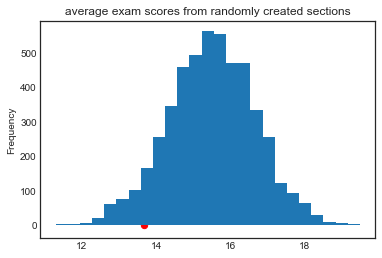

In [56]:
pd.Series(averages, name='Average').plot(
    kind='hist', 
    bins=25,
    title='average exam scores from randomly created sections'
)
plt.scatter(observed_avg, 0, color='red', s=40);

* Not as obvious as previous examples!
* Need a concept to capture the uncertainty of the conclusion.

### Question
* What is the probability that under the Null Hypothesis, a result *at least* as extreme as our observation holds?
* This quantity is called a **p-value**

In [57]:
# 1/20 worse than section 3 did
np.count_nonzero(averages <= observed_avg) / N_trials

0.067

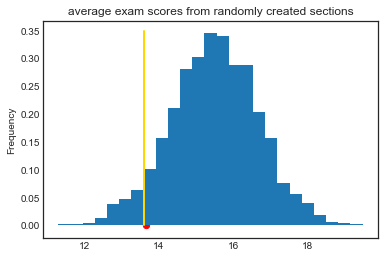

In [58]:
pd.Series(averages, name='Average').plot(
    kind='hist', 
    bins=25,
    title='average exam scores from randomly created sections',
    density=True
)
plt.scatter(observed_avg, 0, color='red', s=40);

plt.plot([13.6, 13.6], [0, 0.35], color='gold', lw=2);

# Statistical Significance

## Conventions About Inconsistency

* **“Inconsistent”**: The test statistic is in the tail of the empirical distribution under the null hypothesis

* **“In the tail,” first convention**:
    - The area in the tail is less than 5%
    - The result is “statistically significant”

* **“In the tail,” second convention**:
    - The area in the tail is less than 1%
    - The result is “highly statistically significant”


## Definition of the P-value

Formal name: **observed significance level**

The P-value is the chance, under the null hypothesis, that the test statistic is equal to the value that was observed in the data or is even further in the direction of the alternative.

## An Error Probability

The cutoff for the P-value is an error probability.

* If:
    - your cutoff is 5%
    - and the null hypothesis happens to be true

* then there is about a 5% chance that your test will reject the null hypothesis.


### Speeding up the TA's dilemma

In [50]:
cat_distr = scores['Midterm'].value_counts(normalize=True)
samps = np.random.choice(
    cat_distr.index, 
    p=cat_distr, 
    size=(5000, int(section_size))
)
samps

array([[24, 11, 19, ...,  0, 15, 20],
       [ 9, 18,  0, ...,  7, 17, 18],
       [ 9, 16, 16, ..., 25, 18, 16],
       ...,
       [23, 16, 21, ...,  0, 17, 23],
       [14, 19, 23, ..., 16, 19, 18],
       [18, 24, 12, ...,  1, 23, 23]], dtype=int64)

In [51]:
samps.shape

(5000, 27)

In [52]:
averages = samps.mean(axis=1)
averages

array([16.81481481, 13.48148148, 14.14814815, ..., 15.22222222,
       17.55555556, 16.44444444])

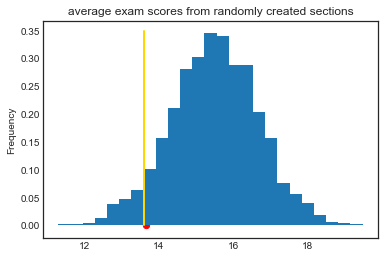

In [53]:
pd.Series(averages, name='Average').plot(
    kind='hist', 
    bins=25,
    title='average exam scores from randomly created sections',
    density=True
)
plt.scatter(observed_avg, 0, color='red', s=40);

plt.plot([13.6, 13.6], [0, 0.35], color='gold', lw=2);

In [55]:
np.count_nonzero(averages <= observed_avg) / 5000

0.067